# Pré-processamento

Scikit-learn: 

https://scikit-learn.org/stable/user_guide.html#user-guide

https://scikit-learn.org/stable/modules/preprocessing.html

https://scikit-learn.org/stable/modules/impute.html#impute

https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/fftpack.html

http://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range

http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling

http://scikit-learn.org/stable/modules/preprocessing.html#discretization

https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features

https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_3d.html?highlight=principal%20component

https://scikit-learn.org/stable/modules/feature_selection.html


Valores Ausentes 

Média em Bases com Numpy Not a Number (np.nan)

In [2]:
import numpy as np

from sklearn.impute import SimpleImputer

X = [[1, 2], [np.nan, 3], [7, 6]]

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)  

X_test = [[np.nan, 2], [6, np.nan], [7, 6]]

print(X_test)
print(imp.transform(X_test))

[[nan, 2], [6, nan], [7, 6]]
[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


Mediana em Bases com -1

In [26]:
X = [[1, 2], [-1, 3], [7, 6]]

imp = SimpleImputer(missing_values=-1, strategy='median')
imp.fit(X)  

X_test = [[-1, 2], [6, -1], [7, 6]]

print(X_test)
print(imp.transform(X_test)) 

[[-1, 2], [6, -1], [7, 6]]
[[4. 2.]
 [6. 3.]
 [7. 6.]]


Valor Arbitrário em Bases com -1

In [3]:
X = [[1, 2], [-1, 3], [7, 6]]

imp = SimpleImputer(missing_values=-1, strategy='constant', 
                    fill_value=11)
imp.fit(X)  

X_test = [[-1, 2], [6, -1], [7, 6]]

print(X_test)
print(imp.transform(X_test))   

[[-1, 2], [6, -1], [7, 6]]
[[11  2]
 [ 6 11]
 [ 7  6]]


Moda em Bases Categóricas com Numpy Not a Number (np.nan)

In [4]:
df = [["a", "x"],
      [np.nan, "y"],
      ["a", np.nan],
      ["b", "y"]]

imp = SimpleImputer(strategy="most_frequent")

print(imp.fit_transform(df))

[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']]


Valor Arbitrário em Bases Categóricas com Numpy Not a Number (np.nan)

In [5]:
df = [["a", "x"],
      [np.nan, "y"],
      ["a", np.nan],
      ["b", "y"]]

imp = SimpleImputer(strategy='constant', fill_value="k")

print(imp.fit_transform(df))

[['a' 'x']
 ['k' 'y']
 ['a' 'k']
 ['b' 'y']]


Remoção de Ruídos

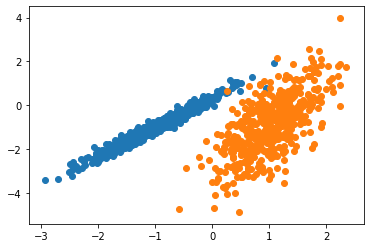

[-1  0  1]


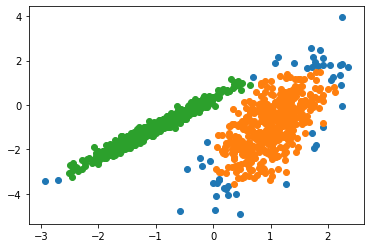

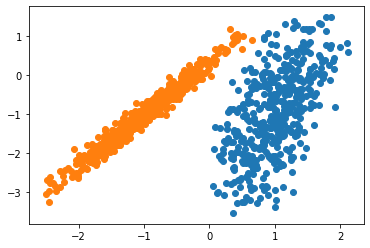

In [6]:
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=2, 
                           n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, random_state=4)
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = where(y == class_value)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

from numpy import unique
from numpy import where
from sklearn.cluster import DBSCAN
from matplotlib import pyplot

# define the model
model = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
dyhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(dyhat)
# create scatter plot for samples from each cluster
print(clusters)

for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(dyhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

X = np.asarray([X[i] for i in range (len(X)) if dyhat[i] != -1])
dyhat = np.asarray([dyhat[i] for i in range (len(dyhat)) if dyhat[i] != -1])

clusters = clusters[1:] 

for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(dyhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Transformação - FFT

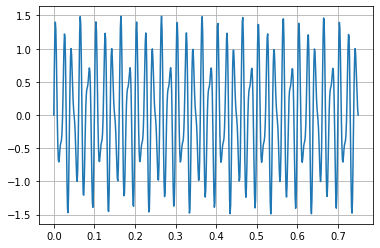

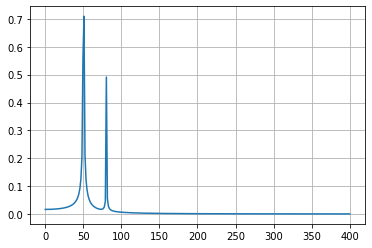

In [7]:
from scipy.fftpack import fft

N = 600

T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

import matplotlib.pyplot as plt

plt.plot(x, y)
plt.grid()
plt.show()

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

Transformação - Mudança de Escala - Máximo

In [8]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.4, random_state=0)

X_train = X_train [:18]
X_test = X_test [:12]

from sklearn import preprocessing
max_abs_scaler = preprocessing.MaxAbsScaler()

X_train_maxabs = max_abs_scaler.fit_transform(X_train)
print ('Train')
print(X_train)
print(X_train_maxabs)

X_test_maxabs = max_abs_scaler.transform(X_test)
print ('\nTest')
print(X_test)
print(X_test_maxabs)

print ('\nMáximos')
print(max_abs_scaler.scale_) 

Train
[[6.  3.4 4.5 1.6]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.9 3.6 1.3]
 [5.5 2.5 4.  1.3]
 [6.1 3.  4.6 1.4]
 [7.2 3.2 6.  1.8]
 [5.3 3.7 1.5 0.2]
 [4.3 3.  1.1 0.1]
 [6.4 2.7 5.3 1.9]
 [5.7 3.  4.2 1.2]
 [5.4 3.4 1.7 0.2]
 [5.7 4.4 1.5 0.4]
 [6.9 3.1 4.9 1.5]
 [4.6 3.1 1.5 0.2]
 [5.9 3.  5.1 1.8]
 [5.1 2.5 3.  1.1]]
[[0.83333333 0.77272727 0.75       0.84210526]
 [0.66666667 0.70454545 0.26666667 0.10526316]
 [0.80555556 0.61363636 0.85       1.        ]
 [0.77777778 0.61363636 0.7        0.68421053]
 [0.77777778 0.65909091 0.6        0.68421053]
 [0.76388889 0.56818182 0.66666667 0.68421053]
 [0.84722222 0.68181818 0.76666667 0.73684211]
 [1.         0.72727273 1.         0.94736842]
 [0.73611111 0.84090909 0.25       0.10526316]
 [0.59722222 0.68181818 0.18333333 0.05263158]
 [0.88888889 0.61363636 0.88333333 1.        ]
 [0.79166667 0.68181818 0.7        0.63157895]
 [0.75       0.77272727 0.28333333 0.10526316]
 [0.79166667 1.         0.25       0.210

Transformação - Mudança de Escala - Max-Min

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()

X_train_minmax = min_max_scaler.fit_transform(X_train)
print ('Train')
print(X_train_minmax)

X_test_minmax = min_max_scaler.transform(X_test)
print ('\nTest')
print(X_test_minmax)

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(10,20))

X_train_minmax = min_max_scaler.fit_transform(X_train)
print ('\nTrain')
print(X_train_minmax)

X_test_minmax = min_max_scaler.transform(X_test)
print ('\nTest')
print(X_test_minmax)

Train
[[0.5862069  0.47368421 0.69387755 0.83333333]
 [0.17241379 0.31578947 0.10204082 0.05555556]
 [0.51724138 0.10526316 0.81632653 1.        ]
 [0.44827586 0.10526316 0.63265306 0.66666667]
 [0.44827586 0.21052632 0.51020408 0.66666667]
 [0.4137931  0.         0.59183673 0.66666667]
 [0.62068966 0.26315789 0.71428571 0.72222222]
 [1.         0.36842105 1.         0.94444444]
 [0.34482759 0.63157895 0.08163265 0.05555556]
 [0.         0.26315789 0.         0.        ]
 [0.72413793 0.10526316 0.85714286 1.        ]
 [0.48275862 0.26315789 0.63265306 0.61111111]
 [0.37931034 0.47368421 0.12244898 0.05555556]
 [0.48275862 1.         0.08163265 0.16666667]
 [0.89655172 0.31578947 0.7755102  0.77777778]
 [0.10344828 0.31578947 0.08163265 0.05555556]
 [0.55172414 0.26315789 0.81632653 0.94444444]
 [0.27586207 0.         0.3877551  0.55555556]]

Test
[[ 0.51724138  0.15789474  0.81632653  1.27777778]
 [ 0.5862069  -0.15789474  0.59183673  0.5       ]
 [ 0.4137931   0.89473684  0.06122449  

Transformação - Padronização

In [10]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaler = scaler.transform(X_train)
print ('Train')
print(X_train_scaler)

X_test_scaler = scaler.transform(X_test)
print ('\nTest')
print(X_test_scaler)

X_scaled = preprocessing.scale(X_train)
print ('\nMean: ', X_scaled.mean(axis=0))
print ('Standard Deviation: ', X_scaled.std(axis=0))

Train
[[ 0.47654796  0.72957418  0.61928848  0.8030962 ]
 [-1.21090055  0.05031546 -1.21746486 -1.3498851 ]
 [ 0.19530654 -0.85536283  0.99930642  1.26444933]
 [-0.08593488 -0.85536283  0.42927952  0.34174306]
 [-0.08593488 -0.40252368  0.04926158  0.34174306]
 [-0.22655559 -1.30820197  0.30260687  0.34174306]
 [ 0.61716867 -0.17610411  0.68262481  0.49552744]
 [ 2.16399646  0.27673503  1.56933331  1.11066496]
 [-0.507797    1.4088329  -1.28080118 -1.3498851 ]
 [-1.91400409 -0.17610411 -1.53414647 -1.50366948]
 [ 1.03903079 -0.85536283  1.12597906  1.26444933]
 [ 0.05468583 -0.17610411  0.42927952  0.18795868]
 [-0.36717629  0.72957418 -1.15412854 -1.3498851 ]
 [ 0.05468583  2.9937699  -1.28080118 -1.04231634]
 [ 1.74213434  0.05031546  0.87263377  0.64931182]
 [-1.49214196  0.05031546 -1.28080118 -1.3498851 ]
 [ 0.33592725 -0.17610411  0.99930642  1.11066496]
 [-0.78903842 -1.30820197 -0.33075635  0.03417431]]

Test
[[ 0.19530654 -0.62894326  0.99930642  2.03337123]
 [ 0.47654796 -1.9

Padronização com Múltiplas Rodadas de Validação Cruzada Estratificada

In [11]:
import numpy as np
from sklearn import datasets
from scipy import stats
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

scalar = StandardScaler()

kNN = KNeighborsClassifier()

pipeline = Pipeline([('transformer', scalar), ('estimator', kNN)])

rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=6)

scores = cross_val_score(pipeline, iris_X, iris_y, scoring='accuracy', 
                         cv = rkf)
print(scores)

mean = scores.mean()
std = scores.std()
inf, sup = stats.norm.interval(0.95, loc=mean, 
                               scale=std/np.sqrt(len(scores)))

print("\nMean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean, std))
print ("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" % 
       (inf, sup)) 

[0.9        0.96666667 0.96666667 1.         0.96666667 0.83333333
 0.93333333 0.96666667 1.         1.         0.9        1.
 1.         1.         0.96666667 1.         0.96666667 0.96666667
 0.86666667 0.96666667 1.         1.         0.83333333 0.93333333
 0.86666667 0.93333333 0.96666667 0.93333333 0.93333333 0.96666667]

Mean Accuracy: 0.95 Standard Deviation: 0.05
Accuracy Confidence Interval (95%): (0.93, 0.97)



Padronização com Múltiplas Rodadas de Validação Cruzada Aninhada Estratificada

In [12]:
from sklearn.model_selection import GridSearchCV

grade={'estimator__n_neighbors': [1,3,5]}

rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

gs = GridSearchCV(estimator=pipeline, param_grid = grade, 
                  scoring='accuracy', cv = 4)

scores = cross_val_score(gs, iris_X, iris_y, scoring='accuracy', 
                         cv = rkf)
print(scores)

mean = scores.mean()
std = scores.std()
inf, sup = stats.norm.interval(0.95, loc=mean, 
                               scale=std/np.sqrt(len(scores)))

print("\nMean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean, std))
print ("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" % 
       (inf, sup)) 

[1.         0.93333333 0.86666667 0.93333333 1.         0.93333333
 1.         0.8        1.         0.93333333 0.93333333 1.
 1.         1.         1.         0.93333333 0.93333333 0.8
 1.         0.93333333 0.8        0.86666667 1.         1.
 1.         1.         1.         0.93333333 0.86666667 1.        ]

Mean Accuracy: 0.95 Standard Deviation: 0.07
Accuracy Confidence Interval (95%): (0.92, 0.97)



Transformação - Discretização em Intervalos de Igual Frequência

In [13]:
est = preprocessing.KBinsDiscretizer(n_bins=[3, 2, 2, 4], 
                                     encode='ordinal').fit(X_train)
X_bin = est.transform(X_train)
print(X_bin)

[[2. 1. 1. 3.]
 [0. 1. 0. 0.]
 [1. 0. 1. 3.]
 [1. 0. 1. 2.]
 [1. 0. 0. 2.]
 [1. 0. 0. 2.]
 [2. 1. 1. 2.]
 [2. 1. 1. 3.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [2. 0. 1. 3.]
 [1. 1. 1. 1.]
 [0. 1. 0. 0.]
 [1. 1. 0. 1.]
 [2. 1. 1. 2.]
 [0. 1. 0. 0.]
 [2. 1. 1. 3.]
 [0. 0. 0. 1.]]


Transformação - Discretização em Intervalos de Igual Tamanho

In [14]:
est = preprocessing.KBinsDiscretizer(n_bins=[3, 2, 2, 4], 
                    encode='ordinal', strategy='uniform').fit(X_train)
X_bin = est.transform(X_train)
print(X_bin)

[[1. 0. 1. 3.]
 [0. 0. 0. 0.]
 [1. 0. 1. 3.]
 [1. 0. 1. 2.]
 [1. 0. 1. 2.]
 [1. 0. 1. 2.]
 [1. 0. 1. 2.]
 [2. 0. 1. 3.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 1. 3.]
 [1. 0. 1. 2.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [2. 0. 1. 3.]
 [0. 0. 0. 0.]
 [1. 0. 1. 3.]
 [0. 0. 0. 2.]]


Transformação - Discretização em Intervalos com Agrupamento Kmeans sobre as Características

In [15]:
est = preprocessing.KBinsDiscretizer(n_bins=[3, 2, 2, 4], 
                    encode='ordinal', strategy='kmeans').fit(X_train)
X_bin = est.transform(X_train)
print(X_bin)

[[1. 0. 1. 2.]
 [0. 0. 0. 0.]
 [1. 0. 1. 3.]
 [1. 0. 1. 1.]
 [1. 0. 1. 1.]
 [1. 0. 1. 1.]
 [1. 0. 1. 1.]
 [2. 0. 1. 3.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [2. 0. 1. 3.]
 [1. 0. 1. 1.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]
 [2. 0. 1. 2.]
 [0. 0. 0. 0.]
 [1. 0. 1. 3.]
 [0. 0. 0. 1.]]


Discretização com Múltiplas Rodadas de Validação Cruzada Aninhada Estratificada

In [16]:
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from numpy import unique

ncl = len(unique (iris_y))
(_, ncr) = iris_X.shape
nb = [2*ncl]*ncr

discret = KBinsDiscretizer(n_bins=nb, encode='ordinal', 
                           strategy='kmeans')
scalar = StandardScaler()

pipeline = Pipeline([('transformer', scalar), ('discretizer', discret),
                     ('estimator', kNN)])


grade={'estimator__n_neighbors': [1,3,5]}

rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=6)

gs = GridSearchCV(estimator=pipeline, param_grid = grade, 
                  scoring='accuracy', cv = 4)

scores = cross_val_score(gs, iris_X, iris_y, scoring='accuracy', 
                         cv = rkf)
print(scores)

mean = scores.mean()
std = scores.std()
inf, sup = stats.norm.interval(0.95, loc=mean, 
                               scale=std/np.sqrt(len(scores)))

print("\nMean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean, std))
print ("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" % 
       (inf, sup)) 

[0.9        0.96666667 0.93333333 0.93333333 1.         0.96666667
 0.93333333 0.96666667 1.         0.96666667 0.86666667 0.93333333
 0.96666667 0.9        1.         0.96666667 1.         1.
 0.93333333 0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.96666667 1.         0.9        0.93333333 0.96666667 0.96666667]

Mean Accuracy: 0.95 Standard Deviation: 0.04
Accuracy Confidence Interval (95%): (0.94, 0.97)



Adaptação - Nominais para Binários

In [11]:
import pandas as pd
import numpy as np

df = pd.DataFrame([['green', 'M', 10.1, 'class1'], 
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
print(df)

size_mapping = {'XL': 3.0, 'L': 2.0, 'M': 1.0}
df['size'] = df['size'].map(size_mapping)
print('\n', df)

enc = preprocessing.OrdinalEncoder()
enc.fit(df[["classlabel"]]) 
df[["classlabel"]] = enc.transform(df[["classlabel"]])
print('\n', df)

data = np.asarray(df[["color"]])
print('\n', data)
encoder = preprocessing.OneHotEncoder(sparse=False)
onehot = encoder.fit_transform(data)
print('\nOnehot\n', onehot)

df = pd.get_dummies(df[['color', 'size', 'price', 'classlabel']])
print('\n', df)

   color size  price classlabel
0  green    M   10.1     class1
1    red    L   13.5     class2
2   blue   XL   15.3     class1

    price  color_blue  color_green  color_red  size_L  size_M  size_XL  \
0   10.1           0            1          0       0       1        0   
1   13.5           0            0          1       1       0        0   
2   15.3           1            0          0       0       0        1   

   classlabel_class1  classlabel_class2  
0                  1                  0  
1                  0                  1  
2                  1                  0  


Extração de Características - Análise de Componentes Principais

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_tr = pca.fit(X_train)
X_ts = X_tr.transform(X_test)
print(X_test)
print(X_ts)

[[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]
 [6.3 3.3 6.  2.5]
 [5.  3.5 1.3 0.3]
 [6.7 3.1 4.7 1.5]
 [6.8 2.8 4.8 1.4]
 [6.1 2.8 4.  1.3]
 [6.1 2.6 5.6 1.4]
 [6.4 3.2 4.5 1.5]]
[[ 1.9092014  -0.47261928]
 [ 0.58944788 -0.4505904 ]
 [-2.31943369  1.07126506]
 [ 3.2325202   0.54168984]
 [-2.31862203  0.14836061]
 [ 2.84325098  0.10063826]
 [-2.4676125   0.23108654]
 [ 1.51598835  0.51547008]
 [ 1.63143132  0.368244  ]
 [ 0.66745378  0.00793265]
 [ 2.11408186 -0.34228403]
 [ 1.23204601  0.40997779]]


Seleção de Características - Remoção de Características com Baixa Variância

In [19]:
from sklearn.feature_selection import VarianceThreshold

X = [[0, 1, 1], [0, 1, 0], [1, 1, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]

sel = VarianceThreshold()
X_t = sel.fit_transform(X)
print(X_t)

X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_t = sel.fit_transform(X)
print('\n', X_t)

[[0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 1]]

 [[0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]]


Seleção de Características - Por Ranqueamento Univariado

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.4, random_state=0)
X_b = SelectKBest(chi2, k=2).fit_transform(X_train, y_train)
print (X_train)
print (X_b)

[[6.  3.4 4.5 1.6]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.9 3.6 1.3]
 [5.5 2.5 4.  1.3]
 [6.1 3.  4.6 1.4]
 [7.2 3.2 6.  1.8]
 [5.3 3.7 1.5 0.2]
 [4.3 3.  1.1 0.1]
 [6.4 2.7 5.3 1.9]
 [5.7 3.  4.2 1.2]
 [5.4 3.4 1.7 0.2]
 [5.7 4.4 1.5 0.4]
 [6.9 3.1 4.9 1.5]
 [4.6 3.1 1.5 0.2]
 [5.9 3.  5.1 1.8]
 [5.1 2.5 3.  1.1]
 [4.6 3.4 1.4 0.3]
 [6.2 2.2 4.5 1.5]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [4.8 3.  1.4 0.1]
 [7.1 3.  5.9 2.1]
 [6.9 3.2 5.7 2.3]
 [6.5 3.  5.8 2.2]
 [6.4 2.8 5.6 2.1]
 [5.1 3.8 1.6 0.2]
 [4.8 3.4 1.6 0.2]
 [6.5 3.2 5.1 2. ]
 [6.7 3.3 5.7 2.1]
 [4.5 2.3 1.3 0.3]
 [6.2 3.4 5.4 2.3]
 [4.9 3.  1.4 0.2]
 [5.7 2.5 5.  2. ]
 [6.9 3.1 5.4 2.1]
 [4.4 3.2 1.3 0.2]
 [5.  3.6 1.4 0.2]
 [7.2 3.  5.8 1.6]
 [5.1 3.5 1.4 0.3]
 [4.4 3.  1.3 0.2]
 [5.4 3.9 1.7 0.4]
 [5.5 2.3 4.  1.3]
 [6.8 3.2 5.9 2.3]
 [7.6 3.  6.6 2.1]
 [5.1 3.5 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [5.7 2.8 4.5 1.3]
 [6.6 3.  4.4 1.4]
 [5.  3.2 1.2 0.2]
 [5.1 3.3 1.7 0.5]
 [6.4 2.9 4.

Seleção de Características - Seleção Sequencial para Frente

In [21]:
from sklearn.neighbors import KNeighborsClassifier

oneNN = KNeighborsClassifier(n_neighbors=1)

from sklearn.feature_selection import SequentialFeatureSelector

sfs_forward = SequentialFeatureSelector(oneNN, n_features_to_select=2,
                direction='forward').fit(X_train, y_train)

feature_names = np.array(iris.feature_names)

print("Features selected by forward sequential selection: ")
print(feature_names[sfs_forward.get_support()])

Features selected by forward sequential selection: 
['sepal length (cm)' 'petal width (cm)']


Seleção de Características - Seleção Sequencial para Trás

In [22]:
sfs_backward = SequentialFeatureSelector(oneNN, n_features_to_select=1,
                direction='backward').fit(X_train, y_train)


print("Features selected by backward sequential selection: ")
print(feature_names[sfs_backward.get_support()])

Features selected by backward sequential selection: 
['petal width (cm)']


### Exercícios de Fixação

1. Porque substituir um elemento ausente pelo mais frequente pode introduzir viés na base de dados? Defina bases Z_Train e Z_Test exatamente como X_Train e X_Test no exemplo de Mudança de Escala - Máximo neste notebook. Considere que o valor 1.5 representa um elemento ausente. Substitua as ocorrências de valores ausentes pelo valor mais frequente nas bases de treino Z_Train e na base de teste Z_Test. 

O que pode acontecer ao colocar um elemento mais frequente, é a maior chance de classificar as linhas erroneamente, pois tendo maior número de dados com essa nova informação, acaba compromentendo que tem a menor quantidade. Por exemplo, suponha que o valor mais frequente seja o valor mais alto do banco de dados, caso os dados sejam preenchidos com esse valor, os novos dados de teste terão maior chance de serem classificados como o maior dado erroneamente, já que não houve paramentro para o preenchimento dos elementos ausentes.

In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

iris = datasets.load_iris()

Z_train, Z_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.4, random_state=0)

Z_train = Z_train [:18]
Z_test = Z_test [:12]

imputer = SimpleImputer(strategy="most_frequent", missing_values=1.5)

print(imputer.fit_transform(Z_train))
print(imputer.fit_transform(Z_test))



[[6.  3.4 4.5 1.6]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.9 3.6 1.3]
 [5.5 2.5 4.  1.3]
 [6.1 3.  4.6 1.4]
 [7.2 3.2 6.  1.8]
 [5.3 3.7 4.2 0.2]
 [4.3 3.  1.1 0.1]
 [6.4 2.7 5.3 1.9]
 [5.7 3.  4.2 1.2]
 [5.4 3.4 1.7 0.2]
 [5.7 4.4 4.2 0.4]
 [6.9 3.1 4.9 0.2]
 [4.6 3.1 4.2 0.2]
 [5.9 3.  5.1 1.8]
 [5.1 2.5 3.  1.1]]
[[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 4.  0.2]
 [6.3 3.3 6.  2.5]
 [5.  3.5 1.3 0.3]
 [6.7 3.1 4.7 0.2]
 [6.8 2.8 4.8 1.4]
 [6.1 2.8 4.  1.3]
 [6.1 2.6 5.6 1.4]
 [6.4 3.2 4.5 0.2]]


2. Ruídos são dados muito diferentes que os usuais na base dados que normalmente necessitam ser removidos. Cite uma situação na qual a remoção de ruídos pode ser desinteressante.

A remoção de um ruído pode ser desinteressante caso você queira trabalhar com casos similares a clonagem de cartões, dividas fraudulentas, etc. Pois nesses casos são necessários a identificação outlier para verificar se aquela operação foi fraudulenta ou não. Geralmente essas operações fraudulentas, são outliers nessas bases.

3. Justifique porque a obtenção dos fatores de normalização não deve ser realizada na base de dados completa, apenas na base de treinamento. Padronize a base Z_Train e utilize os mesmos fatores de normalização para padronizar a base Z_Test. Atenção: crie novas bases para não alterar a definição original de Z_Train e Z_Test.

A normalização não pode ser feita na base de testes, porque caimos no problema de enchergar dados que não temos, fazendo com que o treinamento seja inválido. O correto é utilizar na base de treinamento, guardar os dados e após isso normalizar a base de testes.

In [13]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

iris = datasets.load_iris()

train, test, trainY, testY = train_test_split(
    iris.data, iris.target, test_size=0.4, random_state=0)

train = train [:18]
test = test [:12]

imputer = SimpleImputer(strategy="most_frequent", missing_values=1.5)

train = imputer.fit_transform(train)
test = imputer.fit_transform(test)

minMaxScaler =  preprocessing.MinMaxScaler()

normalizedTrain =minMaxScaler.fit_transform(train)
normalizedTest = minMaxScaler.transform(test)

print(normalizedTrain)
print(normalizedTest)


[[0.5862069  0.47368421 0.69387755 0.83333333]
 [0.17241379 0.31578947 0.10204082 0.05555556]
 [0.51724138 0.10526316 0.81632653 1.        ]
 [0.44827586 0.10526316 0.63265306 0.66666667]
 [0.44827586 0.21052632 0.51020408 0.66666667]
 [0.4137931  0.         0.59183673 0.66666667]
 [0.62068966 0.26315789 0.71428571 0.72222222]
 [1.         0.36842105 1.         0.94444444]
 [0.34482759 0.63157895 0.63265306 0.05555556]
 [0.         0.26315789 0.         0.        ]
 [0.72413793 0.10526316 0.85714286 1.        ]
 [0.48275862 0.26315789 0.63265306 0.61111111]
 [0.37931034 0.47368421 0.12244898 0.05555556]
 [0.48275862 1.         0.63265306 0.16666667]
 [0.89655172 0.31578947 0.7755102  0.05555556]
 [0.10344828 0.31578947 0.63265306 0.05555556]
 [0.55172414 0.26315789 0.81632653 0.94444444]
 [0.27586207 0.         0.3877551  0.55555556]]
[[ 0.51724138  0.15789474  0.81632653  1.27777778]
 [ 0.5862069  -0.15789474  0.59183673  0.5       ]
 [ 0.4137931   0.89473684  0.06122449  0.05555556]


4. Se toda discretização implica em perda de informação, enumere razões para se realizar esse tipo de transformação. Discretize a base Z_Train usando a estratégia de igual frequência nos intervalos e utilize os mesmos intervalos para discretizar a base Z_Test. Repita depois usando a estratégia de igual tamanho dos intervalos. Atenção: crie novas bases para não alterar a definição original de Z_Train e Z_Test.

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

iris = datasets.load_iris()

train, test, trainY, testY = train_test_split(
    iris.data, iris.target, test_size=0.4, random_state=0)

train = train [:18]
test = test [:12]

imputer = SimpleImputer(strategy="most_frequent", missing_values=1.5)

train = imputer.fit_transform(train)
test = imputer.fit_transform(test)

discretizer = preprocessing.KBinsDiscretizer(encode='ordinal').fit(train)
train = discretizer.transform(train)
test = discretizer.transform(test)

print(train)
print(test)

[[3. 4. 3. 3.]
 [0. 3. 0. 1.]
 [3. 1. 4. 4.]
 [2. 1. 2. 3.]
 [2. 1. 1. 3.]
 [1. 0. 1. 3.]
 [4. 2. 3. 3.]
 [4. 3. 4. 4.]
 [1. 4. 2. 1.]
 [0. 2. 0. 0.]
 [4. 1. 4. 4.]
 [2. 2. 2. 2.]
 [1. 4. 0. 1.]
 [2. 4. 2. 1.]
 [4. 3. 3. 1.]
 [0. 3. 2. 1.]
 [3. 2. 4. 4.]
 [0. 0. 0. 2.]]
[[3. 1. 4. 4.]
 [3. 0. 1. 2.]
 [1. 4. 0. 1.]
 [4. 1. 4. 4.]
 [0. 4. 1. 1.]
 [4. 3. 4. 4.]
 [0. 4. 0. 1.]
 [4. 3. 3. 1.]
 [4. 1. 3. 3.]
 [4. 1. 1. 3.]
 [4. 0. 4. 3.]
 [4. 3. 3. 1.]]


5. Uma alternativa para lidar com dados nominais é transformá-los em dados binários ou ordinais. Quando se deve transformar para binários e quando deve se transformar para ordinais? Qual a desvantagem em usar a abordagem de transformar dados nominais para binários? Crie um dataset com 5 exemplos com dados nominais para condições do dia com temperatura (baixa, média e alta), aparência (ensolarado, nublado, chuvoso) e vento (pouco, muito). Transforme os dados de temperatura e vento para o formato ordinal e o de aparência para o formato binário.

A transformação em dados binários é quando os dados não tem ordem e não podem ter distancia entre eles. Já na transformação de ordinalidade, é quando os dados tem uma ordem como tamanho de camisa, etc. A desvantagem de transformar os dados para binários, é por causa que nessa abordagem você está aumentando o número de caracteristicas e nesse caso será necessário mais processamento.

In [17]:
import numpy as np
import pandas as pd
from sklearn import preprocessing 

dataFrame = pd.DataFrame([
    ['baixa', 'ensolarado', 'pouco'],
    ['alta', 'nublado', 'muito'],
    ['media', 'ensolarado', 'pouco'],
    ['alta', 'chuvoso', 'muito'],
    ['baixa', 'ensolarado', 'pouco'],
])

dataFrame.columns = ['condicoes', 'aparencia', 'vento']

encoder = preprocessing.OrdinalEncoder()

encoder.fit(dataFrame[['condicoes']])
dataFrame[['condicoes']] = encoder.transform(dataFrame[['condicoes']])

encoder.fit(dataFrame[['vento']])
dataFrame[['vento']] = encoder.transform(dataFrame[['vento']])

dataFrame = pd.concat([dataFrame, pd.get_dummies(dataFrame[['aparencia']])], axis = 1)
print(dataFrame)



  condicoes   aparencia vento  aparencia_chuvoso  aparencia_ensolarado  \
0       1.0  ensolarado   1.0                  0                     1   
1       0.0     nublado   0.0                  0                     0   
2       2.0  ensolarado   1.0                  0                     1   
3       0.0     chuvoso   0.0                  1                     0   
4       1.0  ensolarado   1.0                  0                     1   

   aparencia_nublado  
0                  0  
1                  1  
2                  0  
3                  0  
4                  0  


6. Explique o significado da chamada maldição da dimensionalidade?

A maldição da dimensionalidade nada mais é do que o custo de processamento para ter um classificador eficaz quando há um grande número de caracteristicas.

7. Qual a diferença entre extração e seleção de características? Compare o desempenho (acurácia média, desvio padrão e intervalo de confiança a 95%) do método PCA com três componentes com o método de seleção univariada de características usando quiquadrado e selecionando 3 características no dataset wine. Use o classificador Vizinho Mais Próximo (k = 1) e o método de validação cruzada com 10 folds. 

A extração é apenas a parte onde você remove dados para a diminuição do número de caracteristicas, além de dados repetidos. Já a seleção, é a retirada de caracteristicas com baixa variancia e tambem dados redundantes.

8. Explique porque a seleção univariada de características, isto é, baseada no poder de diferenciação individual das características, pode não ser a melhor estratégia de seleção?

9. Qual a diferença entre o uso da abordagem filtro e wrapper no processo de busca pelo melhor subconjunto de características? Apresente vantagens e desvantagens de cada uma. Obtenha o desempenho (acurácia média, desvio padrão e intervalo de confiança a 95%) do  método de seleção multivariada de características com seleção sequencial para frente e selecionando 3 características no dataset wine. Use o classificador Vizinho Mais Próximo (k = 1) e o método de validação cruzada com 10 folds. 

A abordagem de filtro é utilizado o valor para avaliar os subconjuntos de caracteristicas, além de ter a avaliação mais rapida e independente do método de aprendizado. Já o wrapper, utiliza o proprio classificadora para avaliar, sendo que é necessário a customização para cada classificador.

10. De que se trata o artigo "Fast Feature Selection Using Hybrid Ranking and Wrapper Approach for Automatic Fault Diagnosis of Motorpumps Based on Vibration Signals"? Porque a abordagem proposta se intitula híbrida?

11. Explique a estratégia de redução de dados utilizada no artigo "Sampling approaches for applying DBSCAN to large datasets".